<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from scipy import stats  # Corrección: mejor importarlo directamente como stats

%matplotlib inline
%autosave 60

sns.set_style('dark')
sns.set(font_scale=1.2)

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)



UsageError: Line magic function `%autosave` not found.


#### Read the dataset in the csv file from the URL


In [58]:
df = pd.read_csv("boston_housing.csv")


In [59]:
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


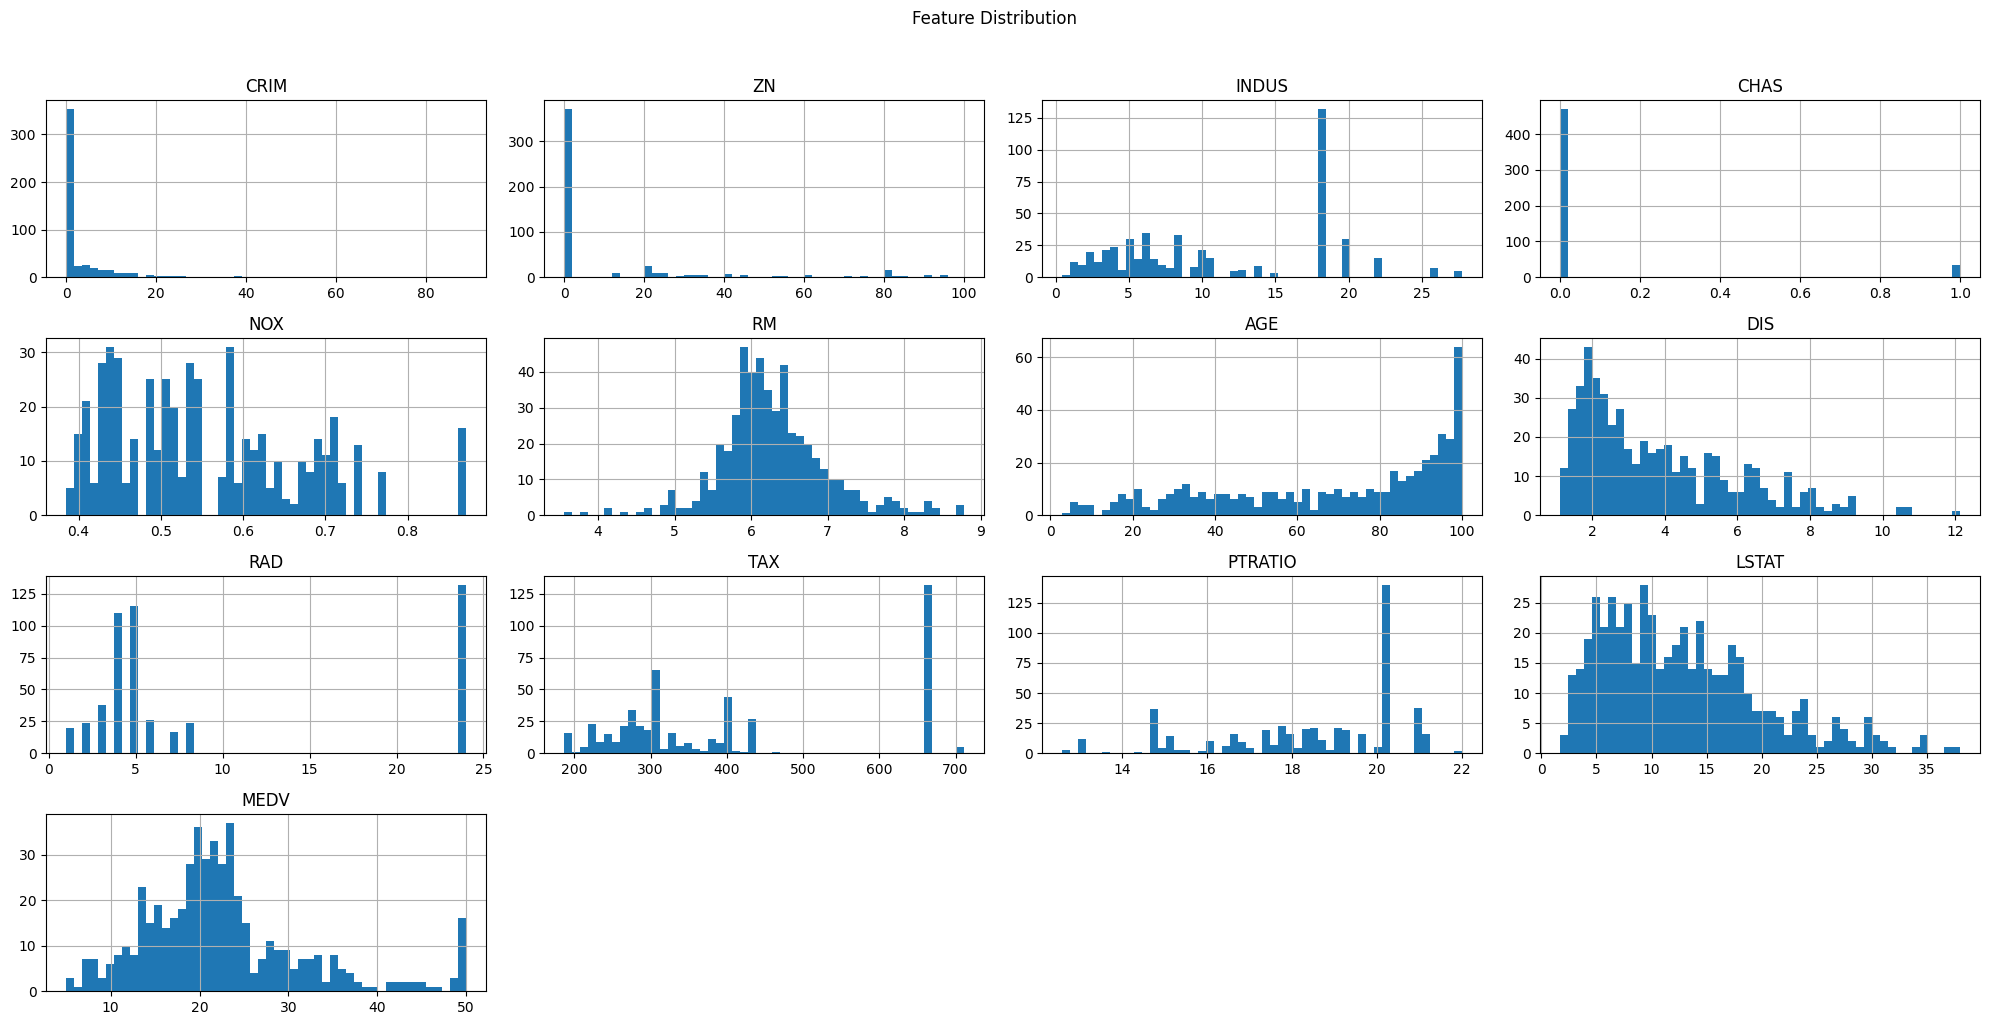

<Figure size 2000x2000 with 0 Axes>

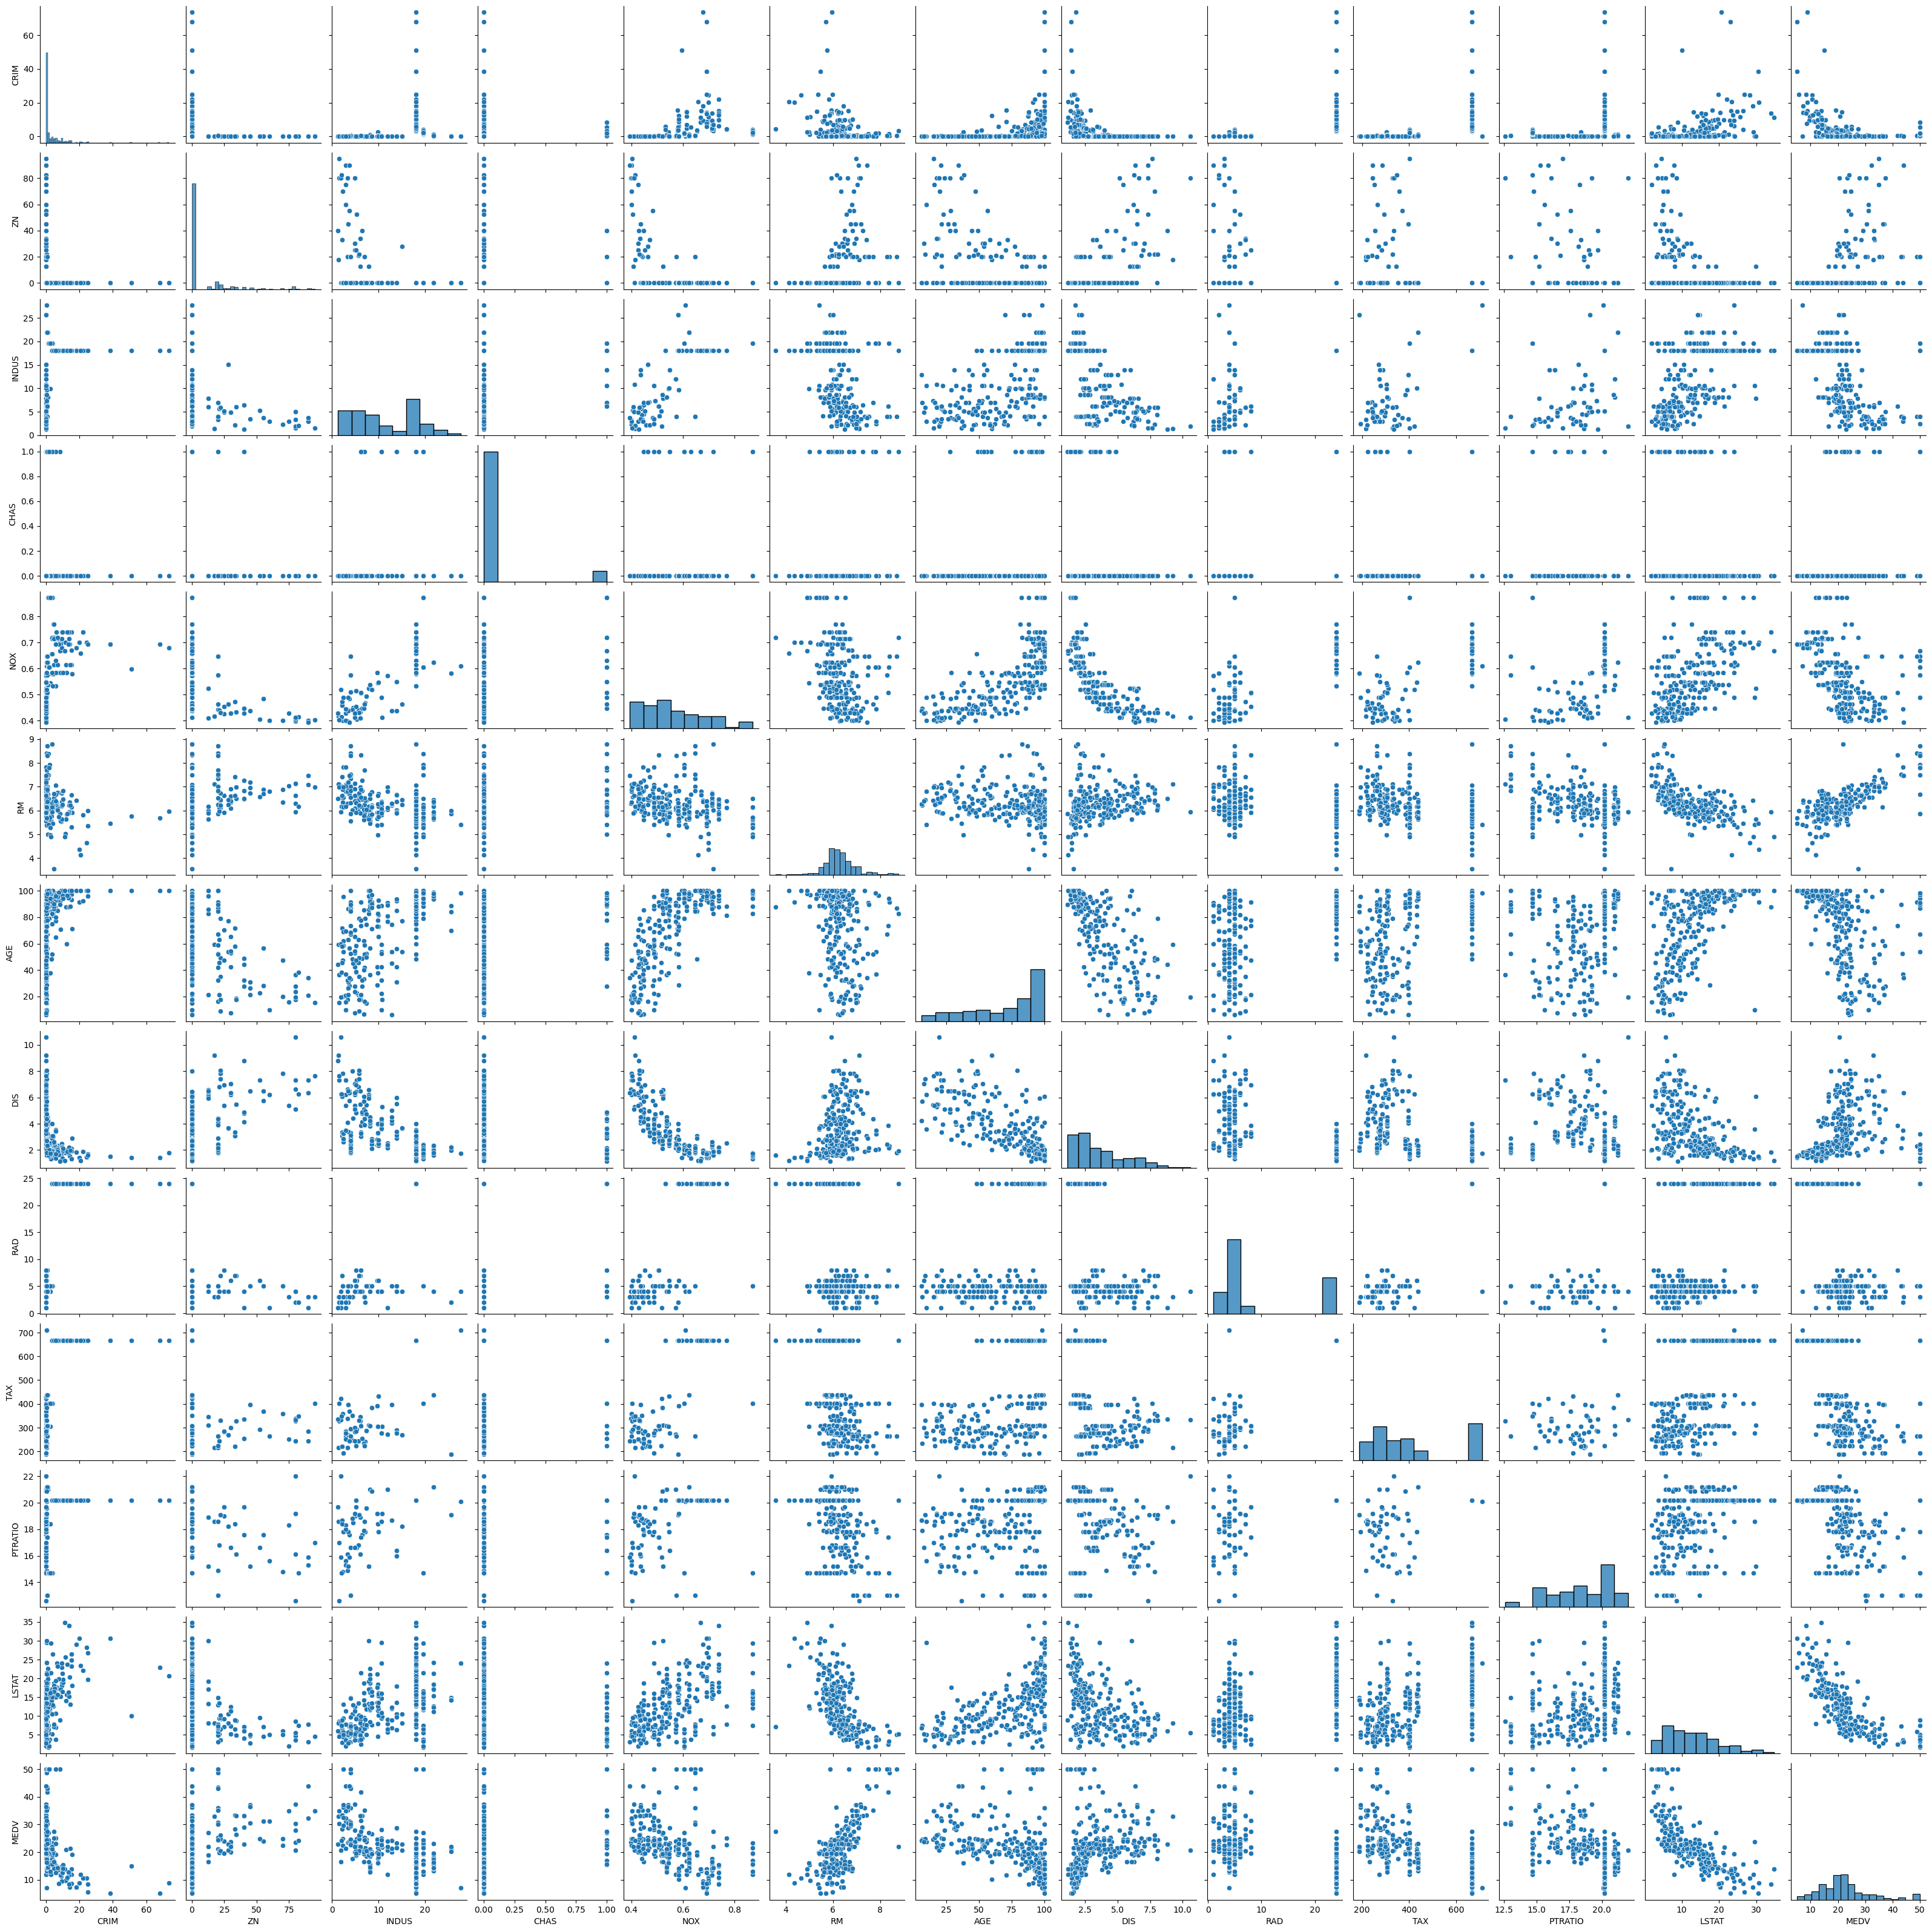

In [60]:
# Histograma de todas las variables
df.hist(bins=50, figsize=(20, 10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

# Pairplot de una muestra aleatoria de 250 puntos
plt.figure(figsize=(20, 20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(df.sample(250))
plt.show()


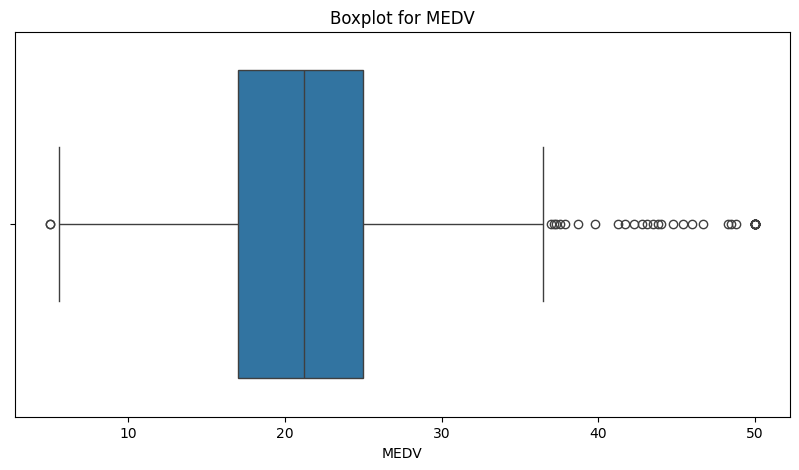

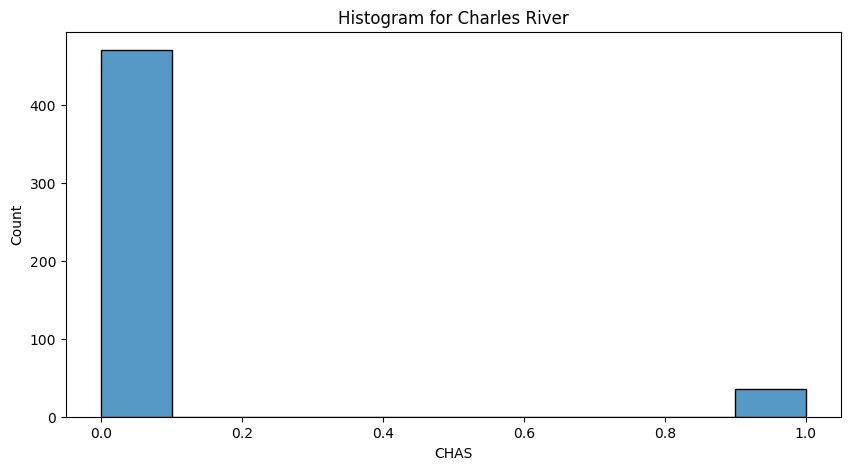

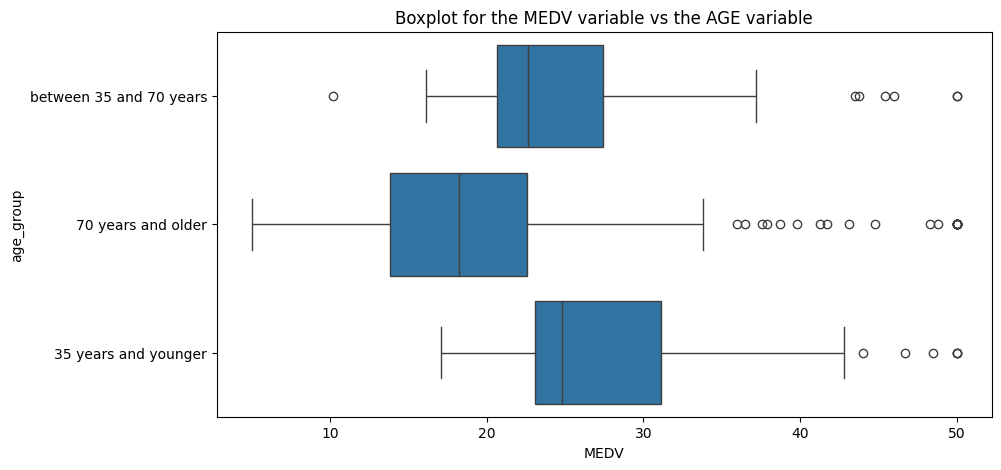

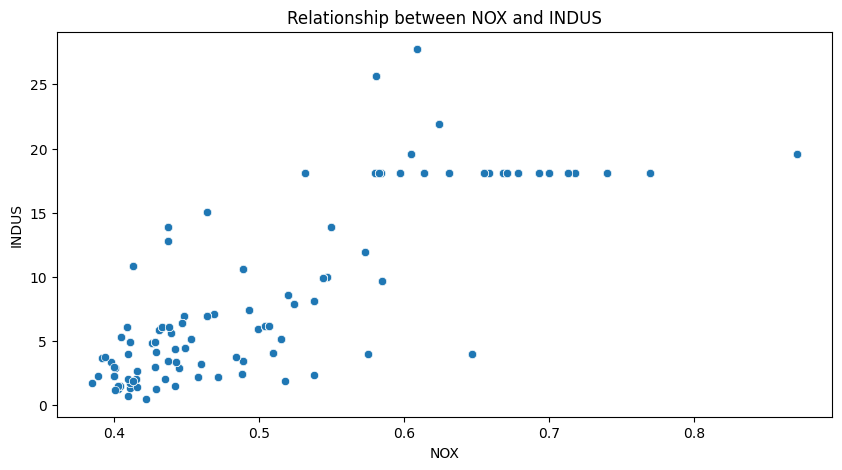

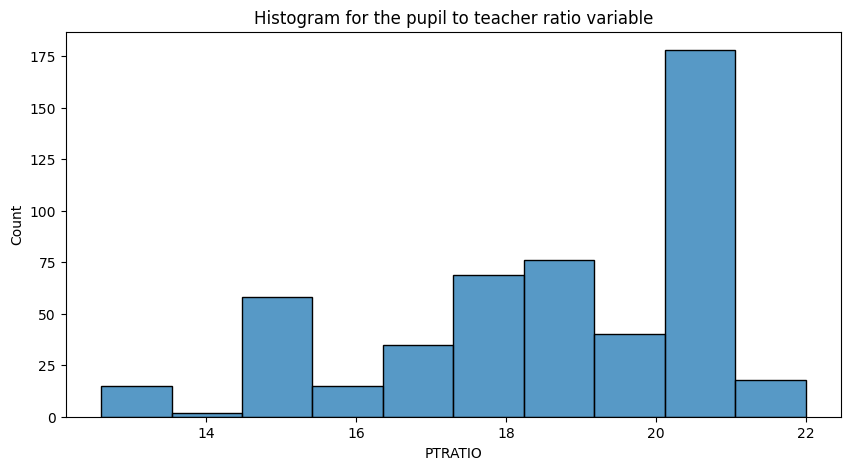

In [61]:
# Boxplot para la variable MEDV
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['MEDV'])
plt.title("Boxplot for MEDV")
plt.show()

# Histograma para la variable CHAS (Charles River)
plt.figure(figsize=(10, 5))
sns.histplot(df['CHAS'], bins=10, kde=False)
plt.title("Histogram for Charles River")
plt.show()

# Agrupación de edades y análisis mediante boxplot
df.loc[df["AGE"] <= 35, 'age_group'] = '35 years and younger'
df.loc[(df["AGE"] > 35) & (df["AGE"] < 70), 'age_group'] = 'between 35 and 70 years'
df.loc[df["AGE"] >= 70, 'age_group'] = '70 years and older'

plt.figure(figsize=(10, 5))
sns.boxplot(x='MEDV', y='age_group', data=df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

# Scatterplot para NOX e INDUS
plt.figure(figsize=(10, 5))
sns.scatterplot(x='NOX', y='INDUS', data=df)
plt.title("Relationship between NOX and INDUS")
plt.show()

# Histograma para la relación alumno-profesor (PTRATIO)
plt.figure(figsize=(10, 5))
sns.histplot(df['PTRATIO'], bins=10, kde=False)
plt.title("Histogram for the pupil to teacher ratio variable")
plt.show()


In [62]:
# Prueba T para CHAS
a = df[df["CHAS"] == 0]["MEDV"]
b = df[df["CHAS"] == 1]["MEDV"]
t_stat, p_value = stats.ttest_ind(a, b, axis=0, equal_var=True)
print(f"T-Statistic={t_stat}, P-value={p_value}")

# ANOVA para AGE y MEDV
low = df[df["age_group"] == '35 years and younger']["MEDV"]
mid = df[df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = df[df["age_group"] == '70 years and older']["MEDV"]
f_stat, p_value = stats.f_oneway(low, mid, high)
print(f"F-Statistic={f_stat}, P-value={p_value}")

# Correlación de Pearson para NOX e INDUS
pearson_corr, p_value = stats.pearsonr(df["NOX"], df["INDUS"])
print(f"Pearson Correlation={pearson_corr}, P-value={p_value}")

# Regresión lineal para DIS y MEDV
y = df['MEDV']
X = df['DIS']
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())


T-Statistic=-3.996437466090509, P-value=7.390623170519905e-05
F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15
Pearson Correlation=0.7636514469209192, P-value=7.913361061210442e-98
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        14:04:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                

In [64]:
df_numeric = df.select_dtypes(include=[float, int]).dropna()
correlation_matrix = df_numeric.corr()
print(correlation_matrix)


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
LSTAT    0.455621 -0.412995 

In [65]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        14:07:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analysis:

Specific Analysis
For each of the specific analyses requested, it is important to follow the project instructions carefully. Below is a complete description of each analysis, which includes the definition of hypotheses, performing statistical tests, and presenting conclusions:

Boxplot of the Median Value of Owner-Occupied Homes (MEDV):

Hypothesis: The boxplot should display the distribution of the median values of homes (MEDV), which will allow us to identify potential outliers and the overall spread of the data.
Explanation: After generating the boxplot, it is essential to explain the observed distribution. For example, are there any outliers? Is the median skewed to one side? The boxplot will help us understand the central tendency and variability of home values within the dataset, which can provide insights into the real estate market dynamics in the area.
Bar Plot for the Charles River Variable (CHAS):

Hypothesis: A bar plot can show the distribution of the CHAS variable, indicating the number of homes that are near the Charles River (with CHAS = 1) compared to those that are not (with CHAS = 0).
Explanation: This plot will provide insights into the proportion of homes that are close to the river. Understanding this distribution is crucial as proximity to the river may influence home values and other related variables. After creating the bar plot, discuss the distribution, such as whether there is a significant number of homes near the river and how this could impact other analyses.
Boxplot for MEDV vs AGE Variable:

Hypothesis: By segmenting the AGE variable into groups and comparing it with MEDV, the boxplot will show how the age of the homes might affect their median value.
Explanation: The AGE variable is divided into three groups: 35 years and younger, between 35 and 70 years, and 70 years and older. The boxplot will help us analyze whether there is a trend in the distribution of MEDV based on the age of the homes. After generating the boxplot, the analysis should focus on identifying patterns, such as whether older homes tend to have higher or lower median values compared to newer homes.
Scatterplot between NOX and INDUS:

Hypothesis: This scatterplot allows us to explore the relationship between the concentration of nitrogen oxides (NOX) and the proportion of non-retail business acres (INDUS) per town.
Explanation: The scatterplot provides a visual representation of the relationship between these two variables. After generating the scatterplot, it is important to discuss whether the relationship observed suggests a positive or negative correlation. Additionally, the correlation coefficient derived from the Pearson correlation test should be mentioned to quantify the strength and direction of this relationship.
Histogram for the Pupil-Teacher Ratio Variable (PTRATIO):

Hypothesis: The histogram will show the distribution of the pupil-teacher ratio (PTRATIO) across different areas in the dataset.
Explanation: The histogram allows us to understand how the pupil-teacher ratio is distributed within the dataset. After creating the histogram, the analysis should discuss any concentration or spread in the data. For example, are there clusters of towns with particularly high or low pupil-teacher ratios? Understanding this distribution is essential, as it may correlate with other factors such as educational outcomes or property values.

Conclusions and Explanations:

After conducting the statistical tests, it is crucial to provide clear conclusions that follow the format of null and alternative hypotheses. Here is an example of how to structure the conclusions for each test performed:

T-test for the difference in median home values near the Charles River (CHAS):

Null Hypothesis (H₀): There is no significant difference in the median value of homes (MEDV) between those near the Charles River and those that are not.
Alternative Hypothesis (H₁): There is a significant difference in the median value of homes (MEDV) between those near the Charles River and those that are not.
Conclusion: If the p-value is less than 0.05, we reject the null hypothesis, concluding that there is a significant difference in the median value of homes between those near the Charles River and those that are not. If the p-value is greater than 0.05, we do not reject the null hypothesis.
ANOVA for the relationship between the age of homes (AGE) and the median value (MEDV):

Null Hypothesis (H₀): There is no significant difference in the median value of homes (MEDV) across different age categories (35 years or younger, between 35 and 70 years, 70 years or older).
Alternative Hypothesis (H₁): There is a significant difference in the median value of homes (MEDV) across different age categories.
Conclusion: If the p-value is less than 0.05, we reject the null hypothesis, concluding that there is a significant difference in the median value of homes across different age groups. If the p-value is greater than 0.05, we do not reject the null hypothesis.
Pearson Correlation between NOX and INDUS:

Null Hypothesis (H₀): There is no significant correlation between the concentration of nitrogen oxides (NOX) and the proportion of non-retail business acres (INDUS).
Alternative Hypothesis (H₁): There is a significant correlation between the concentration of nitrogen oxides (NOX) and the proportion of non-retail business acres (INDUS).
Conclusion: If the p-value is less than 0.05, we reject the null hypothesis, concluding that there is a significant correlation between NOX and INDUS. If the p-value is greater than 0.05, we do not reject the null hypothesis.
Regression Analysis between DIS and MEDV:

Null Hypothesis (H₀): The weighted distance to the five Boston employment centers (DIS) does not have a significant impact on the median value of homes (MEDV).
Alternative Hypothesis (H₁): The weighted distance to the five Boston employment centers (DIS) has a significant impact on the median value of homes (MEDV).
Conclusion: If the coefficient associated with DIS in the regression model has a p-value less than 0.05, we reject the null hypothesis, concluding that the distance to employment centers has a significant impact on the median value of homes.





